# Problem 2

Use this notebook to write your code for problem 2b. Some code snippets from the notebook used in Recitation 1 may be useful to you as examples for using numpy and scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

%matplotlib inline

In [2]:
# This cell imports the csv file and stores the x and y data values into two arrays

import csv

dest_file = "bv_data.csv"

with open(dest_file, 'r') as dest_f:
    data_iter = csv.reader(dest_f, quotechar = '"')
    data = [data for data in data_iter]
    
# Ensure correct data type    
data_array = np.asarray(data[1:], dtype = float) 

# Eliminate the column header labels
x = data_array[:,0]
y = data_array[:,1]


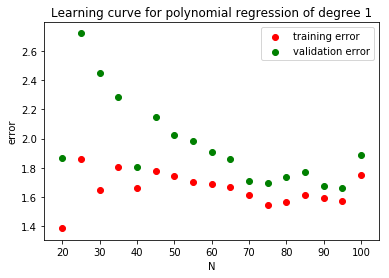

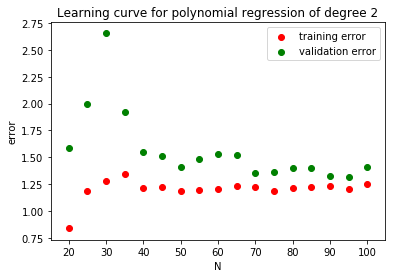

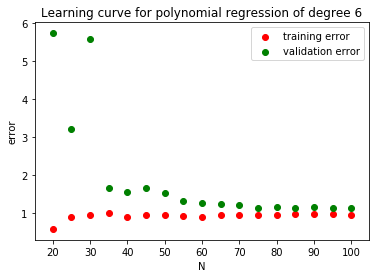

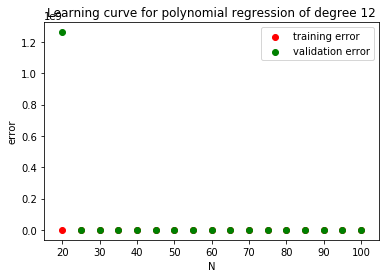

In [3]:
# This cell defines a function for performing 5-fold cross-validation on the first N points in a dataset with d-degree polynomial 
# regression and plots the learning curves

from sklearn.model_selection import KFold

# This function computes the average training error and average validation error from using five fold cross validation on a data
# set of N points and fitting to a polynomial of degree d
def five_fold_cross_validation(N, d):
    kf = KFold(5)
    inds = [ind for ind in kf.split(x[:N], y[:N])]
    total_train_err = 0
    total_val_err = 0
    for i in range(5):
        train, val = inds[i]
        x_train, x_val, y_train, y_val = x[train], x[val], y[train], y[val]
        vals = np.polyfit(x_train, y_train, d)
        total_train_err += np.mean((np.polyval(vals, x_train) - y_train) ** 2)
        total_val_err += np.mean((np.polyval(vals, x_val) - y_val) ** 2)
    avg_train_err = total_train_err / 5
    avg_val_err = total_val_err / 5
    return (avg_train_err, avg_val_err)

# Values for N are stored in a list: N ∈ {20, 25, 30, 35, · · · , 100}
# Values for degrees are stored in a list
N_values = list(range(20, 105, 5))
d_values = [1, 2, 6, 12]

# Plot the average training error and average validation error against N by performing five fold cross validation
for i in range(len(d_values)):
    train_errs = []
    val_errs = []
    d = d_values[i]
    for j in range(len(N_values)):
        N = N_values[j]
        (avg_train_err, avg_val_err) = five_fold_cross_validation(N, d)
        train_errs.append(avg_train_err)
        val_errs.append(avg_val_err)
    plt.scatter(N_values, train_errs, color = 'r', label = "training error")
    plt.scatter(N_values, val_errs, color = 'g', label = "validation error")
    plt.title("Learning curve for polynomial regression of degree " + str(d))
    plt.xlabel("N")
    plt.ylabel("error")
    plt.legend()
    plt.show()

